<a href="https://colab.research.google.com/github/Raghava-1845/NNDL-6/blob/main/kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow numpy

In [ ]:
from PIL import Image
import numpy as np

# Load image
img = Image.open("download.jpg").convert("L")   # "L" = grayscale

# Convert to matrix
matrix = np.array(img)

# Print matrix
print(matrix)

[[158 160 163 ... 133 133 133]
 [160 162 165 ... 133 133 133]
 [163 165 168 ... 133 133 133]
 ...
 [124 124 124 ... 119 119 119]
 [126 126 126 ... 119 119 119]
 [124 124 124 ... 119 119 119]]


Saving download.jpg to download.jpg
RGB Matrix:
 [[[187 147 139]
  [189 149 139]
  [192 152 142]
  ...
  [119 137 149]
  [119 137 149]
  [119 137 149]]

 [[189 149 141]
  [191 151 141]
  [194 154 142]
  ...
  [119 137 149]
  [119 137 149]
  [119 137 149]]

 [[192 152 142]
  [194 154 144]
  [197 157 145]
  ...
  [119 137 149]
  [119 137 149]
  [119 137 149]]

 ...

 [[107 129 140]
  [107 129 140]
  [107 129 140]
  ...
  [104 124 133]
  [104 124 133]
  [104 124 133]]

 [[109 131 142]
  [109 131 142]
  [109 131 142]
  ...
  [104 124 133]
  [104 124 133]
  [104 124 133]]

 [[107 129 140]
  [107 129 140]
  [107 129 140]
  ...
  [104 124 133]
  [104 124 133]
  [104 124 133]]]

Red Channel:
 [[187 189 192 ... 119 119 119]
 [189 191 194 ... 119 119 119]
 [192 194 197 ... 119 119 119]
 ...
 [107 107 107 ... 104 104 104]
 [109 109 109 ... 104 104 104]
 [107 107 107 ... 104 104 104]]

Green Channel:
 [[147 149 152 ... 137 137 137]
 [149 151 154 ... 137 137 137]
 [152 154 157 ... 137 137 137]
 ...

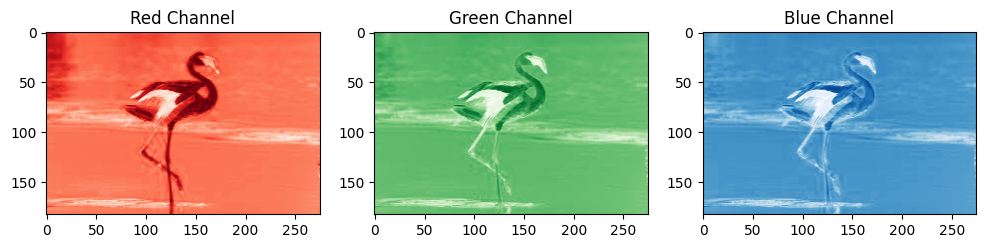

In [1]:
from google.colab import files

import cv2

import numpy as np

from matplotlib import pyplot as plt



# Upload image

uploaded = files.upload()



# Get uploaded filename

image_path = list(uploaded.keys())[0]



# Read image

image = cv2.imread(image_path)



# Convert BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



# Extract channels

R = image[:, :, 0]

G = image[:, :, 1]

B = image[:, :, 2]



# Print matrices

print("RGB Matrix:\n", image)



print("\nRed Channel:\n", R)

print("\nGreen Channel:\n", G)

print("\nBlue Channel:\n", B)



plt.figure(figsize=(12,4))



plt.subplot(1,3,1)

plt.imshow(R, cmap='Reds')

plt.title("Red Channel")



plt.subplot(1,3,2)

plt.imshow(G, cmap='Greens')

plt.title("Green Channel")



plt.subplot(1,3,3)

plt.imshow(B, cmap='Blues')

plt.title("Blue Channel")



plt.show()

In [ ]:
pip install opencv-python numpy matplotlib

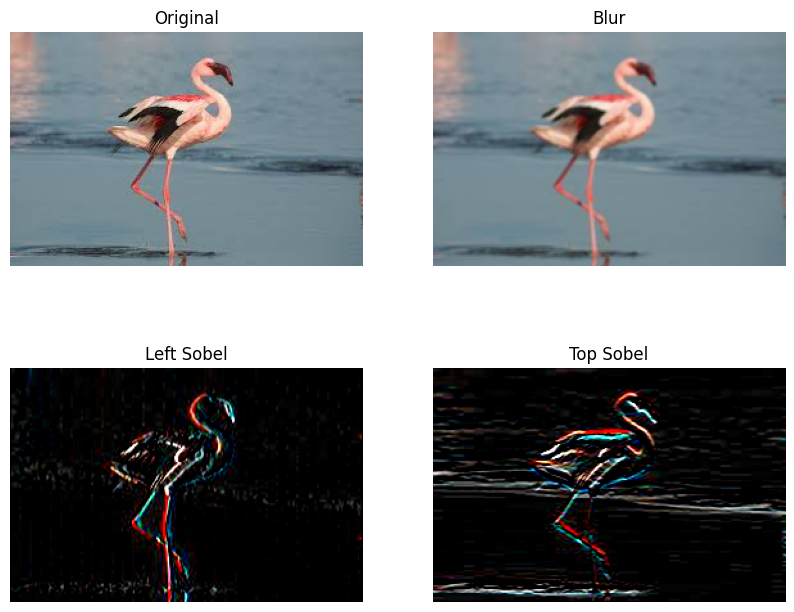

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read color image
img_bgr = cv2.imread("download.jpg") # Changed from "image.png" to "download.jpg"
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# ---------------- Kernels ----------------
blur_kernel = np.ones((3,3), np.float32) / 9

sobel_left_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

sobel_top_kernel = np.array([
    [-1,-2,-1],
    [ 0, 0, 0],
    [ 1, 2, 1]
])

# -------- function to apply filter on RGB --------
def apply_filter_color(image, kernel):
    channels = cv2.split(image)  # split R,G,B
    filtered_channels = []

    for ch in channels:
        filtered = cv2.filter2D(ch, -1, kernel)
        filtered_channels.append(filtered)

    return cv2.merge(filtered_channels)

# ---------------- Apply filters ----------------
blur = apply_filter_color(img, blur_kernel)
sobel_left = apply_filter_color(img, sobel_left_kernel)
sobel_top = apply_filter_color(img, sobel_top_kernel)

# ---------------- Display ----------------
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Blur")
plt.imshow(blur)
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Left Sobel")
plt.imshow(sobel_left)
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Top Sobel")
plt.imshow(sobel_top)
plt.axis("off")

plt.show()